In [1]:
################################################################
############# Statistical Programming with R ###################
################################################################

#Session 12
###################################################
################ Hypothesis Testing ###############
###################################################

#Explain the t-test
#One-sided and two-sided t-test
#Population mean and sample mean
#Population std deviation and sample standard deviation

In [2]:
#Example of one-sample t-test
##################################################
#The mean tariff of a hotel room in New York is $168 per night (Population mean)
#Sample of 25 hotels, Mean is $172.50 with standard deviation $15.40

#Compute t-test, for 5 % significance level
#Alternate Hypothesis are as follows:
#Right-tail: The mean tariff of a hotel room in New York is more than $168 per night
#Left-tail: The mean tariff of a hotel room in New York is less than $168 per night
#Two tail: The mean tariff of a hotel room in New York is not $168 per night.

In [3]:
#T-test, computed value
x=(172.50-168)/(15.40/sqrt(25))
x#Computed Value of Test Statistic = 1.461039

[1] 1.461039

In [4]:
#The critical value at 5% for one-tail is
#Syntax qt(1-level of significance(5%), degree of freedom (n-1))
qt(0.95, 24)
qt(0.05, 24)
?qt

[1] 1.710882

[1] -1.710882

In [5]:
qt(0.975, 24)

[1] 2.063899

In [6]:
qt(0.025,24)

[1] -2.063899

In [7]:
#Critical vaule is 1.710882

#Since the computed value is less than critical value
#Cannot reject the null
#Infer that mean tariff of a hotel room in New York is not more than $168 per night
########################

#Two tail: if the mean tariff of a hotel room in New York is not $168 per night.

#T-test, computed value
(172.50-168)/(15.40/sqrt(25))
#Computed Value of Test Statistic = 1.461039

[1] 1.461039

In [8]:
#The critical value at 5% for one-tail is
#Syntax qt(1-level of significance(5%), degree of freedom (n-1))
qt(0.975, 24)
#Critical vaule is 2.063899

[1] 2.063899

In [9]:
#Since the computed value is less than critical value
#Cannot reject the null
#Infer that mean tariff of a hotel room in New York is $168 per night (statistically no difference between sample and population mean)
###########################################
#It was critical value approach

#We can use p-value approach as well (0.05 p-value)
#One-tail p-value
#Syntax pt(-abs(computed t-test value),degree of freedom)
pt(-abs(1.461039),24) #pt gives cumulative distribution function
#Hence, put - sign to get probability (Explain by PDF and CDF)

[1] 0.07848718

In [10]:
pt(abs(1.461039),24)
1-pt(abs(1.461039),24)

[1] 0.9215128

[1] 0.07848718

In [11]:
#Two-tail p-values
2*pt(-abs(1.461039),24)

[1] 0.1569744

In [12]:
#In both cases, cannot reject Null as p-value is more than 0.05
##################################################

#Now a numerical example
#Do one-sample t-test in R
# Raw dataset -- 32 observations
data = c(21.75, 18.0875, 18.75, 23.5, 14.125, 16.75, 11.125, 11.125, 14.875, 15.5, 20.875,
         17.125, 19.075, 25.125, 27.75, 29.825, 17.825, 28.375, 22.625, 28.75, 27, 12.825, 
         26, 32.825, 25.375, 24.825, 25.825, 15.625, 26.825, 24.625, 26.625, 19.625)

In [13]:
# Student t-Test
mean(data)

[1] 21.5918

In [14]:
t.test(x=data, mu=10, conf.level=0.95)


	One Sample t-test

data:  data
t = 11.225, df = 31, p-value = 1.891e-12
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
 19.48568 23.69792
sample estimates:
mean of x 
  21.5918 


In [15]:
# Manually calculate p-value
t.value = (mean(data) - 10) / (sd(data) / sqrt(length(data)))
#Two-tail p-values
p.value=2*pt(-abs(t.value),df=length(data) - 1)
#########################################################

In [17]:
#By default t.test function arguments
t.test(x, y = NULL, 
       alternative = c("two.sided", "less", "greater"), 
       mu = 0, 
       paired =FALSE, 
       var.equal = FALSE, 
       conf.level = 0.95)
#two.sided is default alternative
#########################################################

ERROR: Error in t.test.default(x, y = NULL, alternative = c("two.sided", "less", : not enough 'x' observations


In [19]:
#Example with Lungcapacity dataset
x=read.csv(file="../Data/Lung Cap_Random.csv")
attach(x)
########################
#One-sided t-test at 95% confidence
#Suppose we test the claim that mean Lungcapacity is <8 (H1)
#H0: Mean>=8    H1: Mean<8

The following objects are masked from x (pos = 3):

    Gender, Lung.Capacity, S.No., Smoke



In [20]:
t.test(Lung.Capacity,mu =8, alternative = "less", conf.level = 0.95)
#Reject the null, infer that true mean is less than 8
##################################
?t.test
########################
#Two-sided t-test at 95% confidence
#Suppose we test the claim that mean Lungcapacity is not equal to 8
#H0: Mean=8    H1: Mean!=8


	One Sample t-test

data:  Lung.Capacity
t = -2.0965, df = 49, p-value = 0.02061
alternative hypothesis: true mean is less than 8
95 percent confidence interval:
    -Inf 7.77968
sample estimates:
mean of x 
      6.9 


In [21]:
t.test(Lung.Capacity,mu =8, alternative = "less", conf.level = 0.95)
#Reject the null, infer that true mean is less than 8
##################################


	One Sample t-test

data:  Lung.Capacity
t = -2.0965, df = 49, p-value = 0.02061
alternative hypothesis: true mean is less than 8
95 percent confidence interval:
    -Inf 7.77968
sample estimates:
mean of x 
      6.9 


In [22]:
########################
#Two-sided t-test at 95% confidence
#Suppose we test the claim that mean Lungcapacity is not equal to 8
#H0: Mean=8    H1: Mean!=8

t.test(Lung.Capacity,mu =8, alternative = "two.sided", conf.level = 0.95)
t.test(Lung.Capacity,mu =8,conf.level = 0.95)


	One Sample t-test

data:  Lung.Capacity
t = -2.0965, df = 49, p-value = 0.04123
alternative hypothesis: true mean is not equal to 8
95 percent confidence interval:
 5.845583 7.954417
sample estimates:
mean of x 
      6.9 



	One Sample t-test

data:  Lung.Capacity
t = -2.0965, df = 49, p-value = 0.04123
alternative hypothesis: true mean is not equal to 8
95 percent confidence interval:
 5.845583 7.954417
sample estimates:
mean of x 
      6.9 


In [23]:
#Reject the null, infer that true mean is not 8
##################################
#Assign to an object
T_test=t.test(Lung.Capacity,mu =8,conf.level = 0.95)

In [24]:
#Extract desired values
T_test$statistic
T_test$p.value

t 
-2.096451

[1] 0.04122793

In [25]:
#####################################################
#####################################################

#Two-sample t-test
#Examine the differences of two sample means
#Compare the Lung capacity of smokers vs non-smokers
class(Smoke)

[1] "factor"

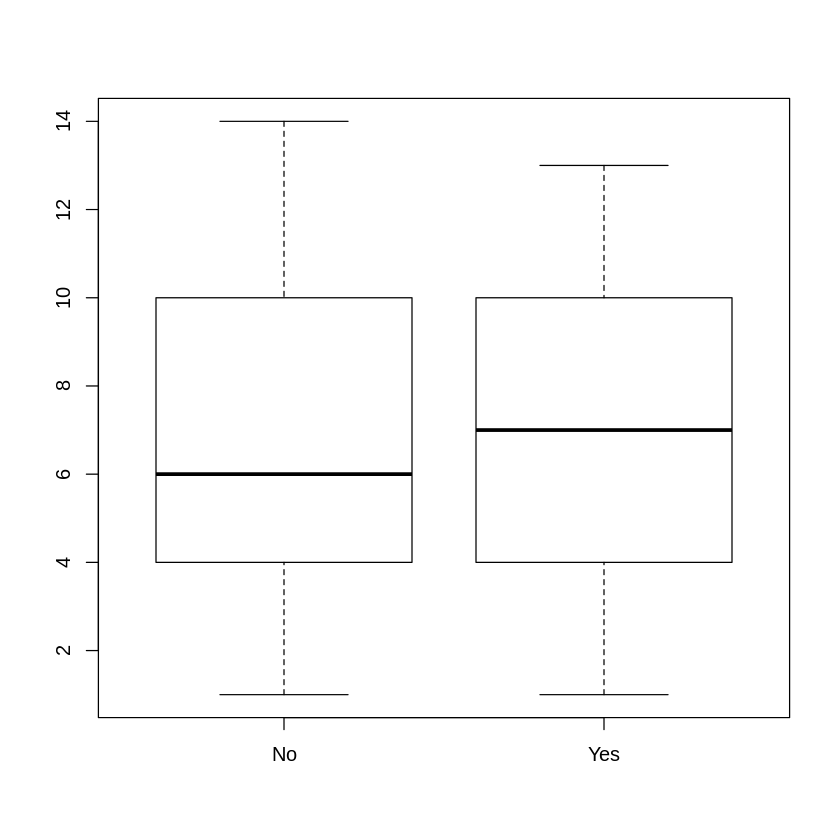

In [26]:
boxplot(Lung.Capacity~Smoke)#Compare the means

In [27]:
#Conduct two-sided t-test
#H0: Mean lung capacity of smokers and non-smokers is equal
#H1: There is a difference
t.test(Lung.Capacity~Smoke,conf.level = 0.95)
#So can not reject the null and infer that there is no difference in Lung capacity


	Welch Two Sample t-test

data:  Lung.Capacity by Smoke
t = -0.045126, df = 46.49, p-value = 0.9642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.191984  2.095830
sample estimates:
 mean in group No mean in group Yes 
         6.875000          6.923077 


In [28]:
#Rather than using ~
t.test(Lung.Capacity[Smoke=="No"],Lung.Capacity[Smoke=="Yes"],conf.level = 0.95)


	Welch Two Sample t-test

data:  Lung.Capacity[Smoke == "No"] and Lung.Capacity[Smoke == "Yes"]
t = -0.045126, df = 46.49, p-value = 0.9642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.191984  2.095830
sample estimates:
mean of x mean of y 
 6.875000  6.923077 


In [29]:
##############################
#Now do t-test for Lung capacity of males and females
t.test(Lung.Capacity~Gender,conf.level = 0.95)


	Welch Two Sample t-test

data:  Lung.Capacity by Gender
t = 0.49168, df = 45.551, p-value = 0.6253
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.609419  2.649419
sample estimates:
mean in group Female   mean in group Male 
                7.16                 6.64 


In [34]:
#So can not reject the null and infer that there is no difference in Lung capacity
##############################
################################################

#Paired t-test
#Compare before and after situation
before=c(10,15,18,20,25,30,32,36,15,18)
after=c(12,18,21,20,22,32,36,30,20,19)
#There is no impact
t.test(before,after,conf.level = 0.95,paired=T)
#####################################################


	Paired t-test

data:  before and after
t = -1.0389, df = 9, p-value = 0.326
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.495229  1.295229
sample estimates:
mean of the differences 
                   -1.1 
